<h1 align=center><font size = 6>ข้อมูลการชนกันในซีแอตเทิล</font></h1>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# เตรียมข้อมูล

ข้อมูล : https://drive.google.com/file/d/1QCBDXabviodtfSak_gwQvjPobGoNuaCE/view?usp=sharing

In [2]:
# ดาว์โหลดไฟล์ csv
df1= pd.read_csv("C:\\Users\\ADMIN\\Downloads\\accident_serverity\\Data-Collisions.csv")

C:\Users\ADMIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# แสดงค่าในตัวแปร PEDROWNOTGRNT ,INATTENTIONIND และ SPEEDING
print(df1['PEDROWNOTGRNT'].unique())
print(df1['SPEEDING'].unique())
print(df1['INATTENTIONIND'].unique())

[nan 'Y']
[nan 'Y']
[nan 'Y']


In [4]:
#  ใส่ N แทน nan ในตัวแปร PEDROWNOTGRNT ,INATTENTIONIND และ SPEEDING
df1['PEDROWNOTGRNT1']=df1['PEDROWNOTGRNT'].fillna('N')
df1['SPEEDING1']=df1['SPEEDING'].fillna('N')
df1['INATTENTIONIND1']=df1['INATTENTIONIND'].fillna('N')

In [5]:
# แสดงข้อมูล
df1.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,PEDROWNOTGRNT1,SPEEDING1,INATTENTIONIND1
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,NaN,10,Entering at angle,0,0,N,N,N,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,N,N,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,4323031.0,NaN,32,One parked--one moving,0,0,N,N,N,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,NaN,23,From same direction - all others,0,0,N,N,N,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,4028032.0,NaN,10,Entering at angle,0,0,N,N,N,N


In [6]:
# แสดงข้อมูลของ column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 41 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SEVERITYCODE     194673 non-null  int64  
 1   X                189339 non-null  float64
 2   Y                189339 non-null  float64
 3   OBJECTID         194673 non-null  int64  
 4   INCKEY           194673 non-null  int64  
 5   COLDETKEY        194673 non-null  int64  
 6   REPORTNO         194673 non-null  object 
 7   STATUS           194673 non-null  object 
 8   ADDRTYPE         192747 non-null  object 
 9   INTKEY           65070 non-null   float64
 10  LOCATION         191996 non-null  object 
 11  EXCEPTRSNCODE    84811 non-null   object 
 12  EXCEPTRSNDESC    5638 non-null    object 
 13  SEVERITYCODE.1   194673 non-null  int64  
 14  SEVERITYDESC     194673 non-null  object 
 15  COLLISIONTYPE    189769 non-null  object 
 16  PERSONCOUNT      194673 non-null  int6

In [7]:
import datetime
def date_sep(date_time):
    p=date_time.split()
    if len(p)==3:
        p1=p[0].split('/')
        q=p[1].split(':')
#         print(q[0],q[1],q[2])
        da_time=datetime.datetime(int(p1[2]),int(p1[0]),int(p1[1]),int(q[0]),int(q[1]),int(q[2]))
#         print(da_time)
        hr_num=int(q[0])
        day_num=int(p1[1])
        year_num=int(p1[2])
        day=da_time.strftime("%A")
        month=da_time.strftime("%B")
    else :
        p1=p[0].split('/')
        q='nan'
        da_time=datetime.datetime(int(p1[2]),int(p1[0]),int(p1[1]))
#         print(da_time)
        hr_num='nan'
        day_num=int(p1[1])
        year_num=int(p1[2])
        day=da_time.strftime("%A")
        month=da_time.strftime("%B")
    return da_time, hr_num,day_num,day,month, year_num

In [8]:
#แสดงรายละเอียดวัน,เวลาและปีที่เกิดเหตุ
round1 = lambda x: date_sep(x)
pr= pd.DataFrame(list(df1['INCDTTM'].apply(round1)),columns=['datime','hr_num','day_num','day','month',' year_num'])
pr.head()

,datime,hr_num,day_num,day,month,year_num
0,2013-03-27 02:54:00,2,27,Wednesday,March,2013
1,2006-12-20 06:55:00,6,20,Wednesday,December,2006
2,2004-11-18 10:20:00,10,18,Thursday,November,2004
3,2013-03-29 09:26:00,9,29,Friday,March,2013
4,2004-01-28 08:04:00,8,28,Wednesday,January,2004


In [9]:
df=pd.concat([df1,pr],axis=1)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,HITPARKEDCAR,PEDROWNOTGRNT1,SPEEDING1,INATTENTIONIND1,datime,hr_num,day_num,day,month,year_num
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,N,N,N,N,2013-03-27 02:54:00,2,27,Wednesday,March,2013
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,N,N,N,N,2006-12-20 06:55:00,6,20,Wednesday,December,2006
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,N,N,N,N,2004-11-18 10:20:00,10,18,Thursday,November,2004
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,N,N,N,N,2013-03-29 09:26:00,9,29,Friday,March,2013
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,N,N,N,N,2004-01-28 08:04:00,8,28,Wednesday,January,2004


In [10]:
# รวมตาราง df1  และตาราง pr
df=pd.concat([df1,pr],axis=1)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,HITPARKEDCAR,PEDROWNOTGRNT1,SPEEDING1,INATTENTIONIND1,datime,hr_num,day_num,day,month,year_num
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,N,N,N,N,2013-03-27 02:54:00,2,27,Wednesday,March,2013
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,N,N,N,N,2006-12-20 06:55:00,6,20,Wednesday,December,2006
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,N,N,N,N,2004-11-18 10:20:00,10,18,Thursday,November,2004
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,N,N,N,N,2013-03-29 09:26:00,9,29,Friday,March,2013
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,N,N,N,N,2004-01-28 08:04:00,8,28,Wednesday,January,2004


In [11]:
#  แสดงตัวแปรในตาราง df
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'PEDROWNOTGRNT1',
       'SPEEDING1', 'INATTENTIONIND1', 'datime', 'hr_num', 'day_num', 'day',
       'month', ' year_num'],
      dtype='object')

In [12]:
# ลบตัวแปรออก
df2=df.drop(columns=['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'INCDATE','SDOT_COLDESC','datime', 'UNDERINFL',
       'INCDTTM','INATTENTIONIND','PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING','ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY'])
df2.head()


,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,...,ST_COLCODE,HITPARKEDCAR,PEDROWNOTGRNT1,SPEEDING1,INATTENTIONIND1,hr_num,day_num,day,month,year_num
0,2,Intersection,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),11,...,10,N,N,N,N,2,27,Wednesday,March,2013
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,...,11,N,N,N,N,6,20,Wednesday,December,2006
2,1,Block,Property Damage Only Collision,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,...,32,N,N,N,N,10,18,Thursday,November,2004
3,1,Block,Property Damage Only Collision,Other,3,0,0,3,Mid-Block (not related to intersection),11,...,23,N,N,N,N,9,29,Friday,March,2013
4,2,Intersection,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),11,...,10,N,N,N,N,8,28,Wednesday,January,2004


In [13]:
#  แสดงตัวแปรในตาราง df2
df2.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'HITPARKEDCAR', 'PEDROWNOTGRNT1', 'SPEEDING1', 'INATTENTIONIND1',
       'hr_num', 'day_num', 'day', 'month', ' year_num'],
      dtype='object')

In [14]:
#  สร้างตัวแปรดัมมี่ในตาราง df3
df3=pd.get_dummies(df2, columns=['ADDRTYPE', 'SEVERITYDESC','COLLISIONTYPE','JUNCTIONTYPE','SDOT_COLCODE', 'WEATHER', 'ROADCOND',
       'LIGHTCOND','ST_COLCODE', 'HITPARKEDCAR', 'PEDROWNOTGRNT1',
       'SPEEDING1', 'INATTENTIONIND1','hr_num', 'day_num', 'day', 'month',
       ' year_num'])
df3.columns

Index(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'ADDRTYPE_Alley', 'ADDRTYPE_Block', 'ADDRTYPE_Intersection',
       'SEVERITYDESC_Injury Collision',
       'SEVERITYDESC_Property Damage Only Collision',
       ...
       ' year_num_2011', ' year_num_2012', ' year_num_2013', ' year_num_2014',
       ' year_num_2015', ' year_num_2016', ' year_num_2017', ' year_num_2018',
       ' year_num_2019', ' year_num_2020'],
      dtype='object', length=298)

In [15]:
df3.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,SEVERITYDESC_Injury Collision,SEVERITYDESC_Property Damage Only Collision,...,year_num_2011,year_num_2012,year_num_2013,year_num_2014,year_num_2015,year_num_2016,year_num_2017,year_num_2018,year_num_2019,year_num_2020
0,2,2,0,0,2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,2,0,0,2,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,4,0,0,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,3,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2,2,0,0,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# กำหนดให้ตัวแปรความรุนแรงของการชน( 'SEVERITYCODE') เป็นตัวแปร y
target =df3['SEVERITYCODE']
#  ลบตัวแปรความรุนแรงของการชน( 'SEVERITYCODE') ออกจากตาราง df3 กำหนดให้เป็นตัวแปร X
df3.drop('SEVERITYCODE',axis=1,inplace=True)
df3.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,SEVERITYDESC_Injury Collision,SEVERITYDESC_Property Damage Only Collision,COLLISIONTYPE_Angles,...,year_num_2011,year_num_2012,year_num_2013,year_num_2014,year_num_2015,year_num_2016,year_num_2017,year_num_2018,year_num_2019,year_num_2020
0,2,0,0,2,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2,0,0,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,3,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,3,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2,0,0,2,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

# แบ่งข้อมูลจากตัวแปร X และ yออกเป็น training และ testing dataset โดยแบ่งเป็น testing dataset  20% ของข้อมูลทั้งหมด
Xtrain, Xtest, ytrain, ytest = train_test_split(df3, target.values,  test_size=0.2,random_state=42)
# แบ่งข้อมูลจากตัวแปร Xtrain และ ytrain ออกเป็น training และ testing dataset โดยแบ่งเป็น testing dataset  30% ของข้อมูลtraining ทั้งหมด
Xtrain_1, Xeval, ytrain_1, yeval = train_test_split(Xtrain, ytrain,  test_size=0.3,random_state=42)

print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)
print(Xtrain_1.shape,ytrain_1.shape)
print(Xeval.shape,yeval.shape)

(155738, 297) (155738,)
(38935, 297) (38935,)
(109016, 297) (109016,)
(46722, 297) (46722,)


# การหาโมเดล

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#  model  LogisticRegression ซึ่งเป็น classification model 
clf = LogisticRegression(random_state=42)
#  พารามิเตอร์ของLogisticRegression 
params = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
# ใช้ GridSearchCV หาค่าพารามิเตอร์ที่ทำให้โมเดลที่ดีที่สุด
#  scoring='f1'  เพราะเป็นการหาค่าแบบ binary
model = GridSearchCV(clf, params, scoring='f1', n_jobs=-1)
model.fit(Xtrain_1, ytrain_1)
# แสดงค่า best_score_,best_score_ และ best_params_
print("\n The best score is: ",model.best_score_)
print("\n The best estimator is:\n",model.best_estimator_)
print("\n The best parameters are:\n",model.best_params_)    



 The best score is:  1.0

 The best estimator is:
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 The best parameters are:
 {'C': 0.1, 'penalty': 'l2'}


In [19]:
# นำค่าที่ได้จากการหา GridSearchCV มาใส่ในmodel
logreg = LogisticRegression(C=0.1, penalty='l2', random_state=42)
logreg.fit(Xtrain_1, ytrain_1)

# ค่าของพารามิเตอร์แต่ละตัวในสมการ
coefs = pd.Series(logreg.coef_.reshape(-1), index=df3.columns)
print(coefs)

PERSONCOUNT       0.071982
PEDCOUNT          0.252521
PEDCYLCOUNT       0.218361
VEHCOUNT          0.003227
ADDRTYPE_Alley   -0.014235
                    ...   
 year_num_2016    0.008329
 year_num_2017    0.009902
 year_num_2018    0.007737
 year_num_2019    0.015383
 year_num_2020    0.018329
Length: 297, dtype: float64


# การประเมินผล

Accuracy of test set is : 1.0


True Negative = 32785	False Positive = 0
False Negative = 0	True Positive=13937


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     32785
           2       1.00      1.00      1.00     13937

    accuracy                           1.00     46722
   macro avg       1.00      1.00      1.00     46722
weighted avg       1.00      1.00      1.00     46722



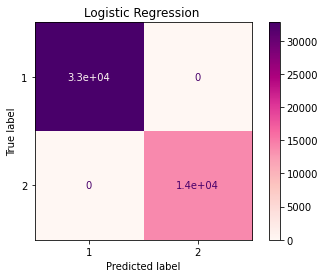

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,plot_confusion_matrix

def model_evaluation(name,model, Xeval, yeval):
#     พยากรณ์ค่า y โดยใช้ข้อมูล Xeval
    ypred = model.predict(Xeval)
    print('Accuracy of test set is :', accuracy_score(yeval, ypred))
    print("\n")
    
#     ค่า confusion matrix
    tn, fp, fn, tp = confusion_matrix(yeval, ypred).ravel()
    print('True Negative = {}\tFalse Positive = {}\nFalse Negative = {}\tTrue Positive={}'
          .format(tn,fp,fn,tp))
#    ตาราง confusion matrix
    disp = plot_confusion_matrix(model, Xeval,yeval ,
                                            display_labels=['1','2'],
                                            cmap=plt.cm.RdPu,
                                            normalize=None)
    disp.ax_.set_title(name)
    
    print("\n")
    print(classification_report(yeval, ypred))
    
model_evaluation('Logistic Regression ',logreg, Xeval, yeval)
 

ค่า accuracy=1 จากการเรียนรู้โดย Xtrain_1 และytrain_1 ทดสอบโดย Logistic Regression model สามารถพยากรณ์ค่า yeval มีความถูกต้อง 100% 
ซึ่งแสดงในตาราง confusion matrix

Gradient Boost Classifier

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt    

#  model  GradientBoostingClassifier ซึ่งเป็น classification model 
model = GradientBoostingClassifier( random_state=42)
#  พารามิเตอร์ของGradientBoostingClassifier
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10) 
                 }
# ใช้ GridSearchCV หาค่าพารามิเตอร์ที่ทำให้โมเดลที่ดีที่สุด
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, 
                               cv = 2, n_iter = 10, n_jobs=-1,random_state=42)
randm.fit(Xtrain_1, ytrain_1)

print("\n The best score is: ",randm.best_score_)
print("\n The best estimator is:\n",randm.best_estimator_)
print("\n The best parameters are:\n",randm.best_params_)    


 The best score is:  1.0

 The best estimator is:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3745401188473625, loss='deviance',
                           max_depth=8, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=370,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.7319939418114051,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

 The best parameters are:
 {'learning_rate': 0.3745401188473625, 'max_depth': 8, 'n_estimators': 370, 'subsample': 0.7319939418114051}


Accuracy of test set is : 1.0


True Negative = 32785	False Positive = 0
False Negative = 0	True Positive=13937


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     32785
           2       1.00      1.00      1.00     13937

    accuracy                           1.00     46722
   macro avg       1.00      1.00      1.00     46722
weighted avg       1.00      1.00      1.00     46722



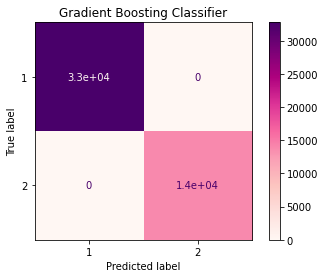

In [36]:
gb = GradientBoostingClassifier(
                    min_samples_split=2, max_depth=8,
                    max_features=None, random_state=42,
                    learning_rate=0.37, n_estimators=370,subsample=0.73)
gb.fit(Xtrain_1, ytrain_1)
model_evaluation('Gradient Boosting Classifier',gb, Xeval, yeval)

ค่า accuracy=1 จากการเรียนรู้โดย Xtrain_1 และytrain_1 ทดสอบโดย Gradient Boosting Classifier model สามารถพยากรณ์ค่า yeval มีความถูกต้อง 100% 
ซึ่งแสดงในตาราง confusion matrix

In [24]:
from sklearn.ensemble import VotingClassifier
# สร้าเมทริกซ์ของค่าน้ำหนัก
weights = [[int(x) for x in list("{0:0b}".format(i).zfill(2))] for i in range(1, 2**2)]
print('Weights matrix is', weights)

# ใช้ VotingClassifier เพื่อหาmodelที่เหมาะสม
# ในกรณีนี้ค่า accuracy ของ Logistic Regressio และ GradientBoostingClassifier มีค่าเท่ากับ 1 สามารถเลือกใช้ model ได้เลย
# แต่ทางผู้เขียนต้องการแสดงทางเลือกในการหา model ที่มีความเหมาะสมมากที่สุดจึงเพิ่มวิธีการ VotingClassifier มาใช้
vclf = VotingClassifier(
    estimators=[('logreg', logreg), ('gb', gb)],
    voting='soft')
params = {'weights': weights}
vmodel = GridSearchCV(vclf, params, scoring='f1', n_jobs=-1)
vmodel.fit(Xtrain_1, ytrain_1)

print("\n The best score is: ",vmodel.best_score_)
print("\n The best estimator is:\n",vmodel.best_estimator_)
print("\n The best parameters are:\n",vmodel.best_params_)    

Weights matrix is [[0, 1], [1, 0], [1, 1]]

 The best score is:  1.0

 The best estimator is:
 VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=0.1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('gb',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
  

การหาโมเดลที่ดีที่สุดโดยใช้ฟังก์ชัน VotingClassifier จากค่าน้ำหนัก(weights)พบว่า โมเดลที่ให้ค่าดีที่สุดคือ Gradient Boosting Classifier model

Accuracy of test set is : 1.0


True Negative = 32785	False Positive = 0
False Negative = 0	True Positive=13937


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     32785
           2       1.00      1.00      1.00     13937

    accuracy                           1.00     46722
   macro avg       1.00      1.00      1.00     46722
weighted avg       1.00      1.00      1.00     46722



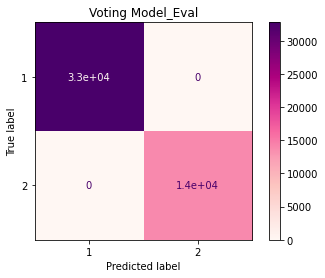

In [25]:
voting = VotingClassifier(
    estimators=[ ('gb', gb)],
#     ใช้ soft พยากรณ์โดยใช้ค่าเฉลี่ยของความน่าจะเป็นในการหา class
    voting='soft', weights = [1])
voting.fit(Xtrain_1, ytrain_1)
model_evaluation('Voting Model_Eval',voting, Xeval, yeval)

ค่า accuracy=1 จากการเรียนรู้โดย Xtrain_1 และytrain_1 ทดสอบโดยใช้ VotingClassifier สามารถพยากรณ์ค่า yeval มีความถูกต้อง 100% 
ซึ่งแสดงในตาราง confusion matrix

# การนำไปใช้

Accuracy of test set is : 1.0


True Negative = 27424	False Positive = 0
False Negative = 0	True Positive=11511


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     27424
           2       1.00      1.00      1.00     11511

    accuracy                           1.00     38935
   macro avg       1.00      1.00      1.00     38935
weighted avg       1.00      1.00      1.00     38935



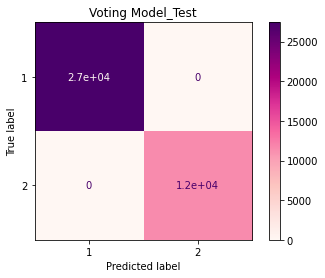

In [26]:
model_evaluation('Voting Model_Test',voting, Xtest, ytest)

ทดสอบความถูกต้ององโมเดลอีกครั้งโดยการพยากรณ์ค่า ytest มีความถูกต้อง 100% ซึ่งแสดงในตาราง confusion matrix 